<a href="https://colab.research.google.com/github/rashme233/hackathonproject/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.DataFrame()
df = pd.read_csv("/content/drive/MyDrive/TCS project/german_credit_data.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [5]:
# Create imputers
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
df[['Saving accounts', 'Checking account']] = imputer.fit_transform(df[['Saving accounts', 'Checking account']])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [7]:
df['Sex'].unique()


array(['male', 'female'], dtype=object)

In [8]:
df['Job'].unique()


array([2, 1, 3, 0])

In [9]:
df['Housing'].unique()


array(['own', 'free', 'rent'], dtype=object)

In [10]:

df['Saving accounts'].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [11]:
df['Duration'].unique()


array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

In [12]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [13]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [14]:
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_housing = LabelEncoder()
df['Housing'] = le_housing.fit_transform(df['Housing'])

le_saving = LabelEncoder()
df['Saving accounts'] = le_saving.fit_transform(df['Saving accounts'].astype(str))

le_purpose = LabelEncoder()
df['Purpose'] = le_purpose.fit_transform(df['Purpose'])

In [15]:
def assign_credit_risk(row):
    risk_score = 0

    if row['Credit amount'] > 15000:
        risk_score += 2
    if row['Duration'] > 36:
        risk_score += 2
    if row['Saving accounts'] in ['little', 'moderate']:
        risk_score += 1
    if row['Checking account'] in ['little', 'moderate']:
        risk_score += 1
    if row['Job'] in [0, 1]:  # unskilled
        risk_score += 1
    if row['Age'] < 25:
        risk_score += 1

    # Define threshold
    if risk_score >= 4:
        return 'bad'
    else:
        return 'good'

df['Credit Risk'] = df.apply(assign_credit_risk, axis=1)



In [16]:
le_Risk = LabelEncoder()
df['Credit Risk'] = le_purpose.fit_transform(df['Credit Risk'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   int64 
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   int64 
 4   Saving accounts   1000 non-null   int64 
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   int64 
 9   Credit Risk       1000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 78.3+ KB


In [18]:
df['Credit Risk'].unique()


array([1, 0])

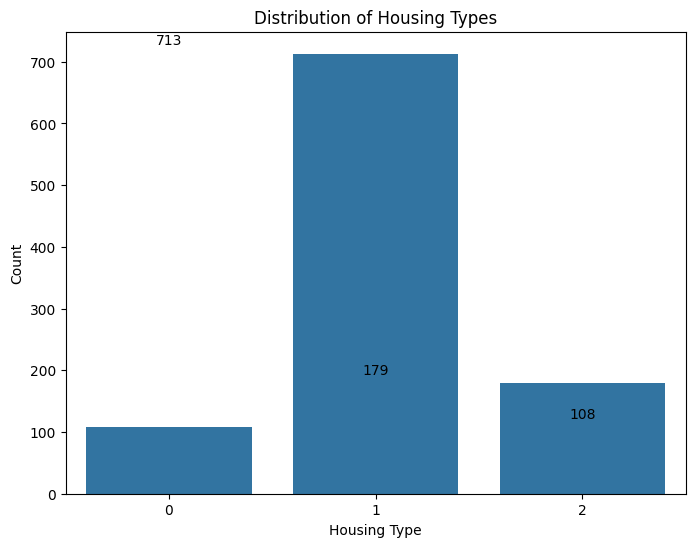

In [19]:
# Count the occurrences of each housing type
housing_counts = df['Housing'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=housing_counts.index, y=housing_counts.values)
plt.xlabel("Housing Type")
plt.ylabel("Count")
plt.title("Distribution of Housing Types")

# Annotate the plot with counts
for i, v in enumerate(housing_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()


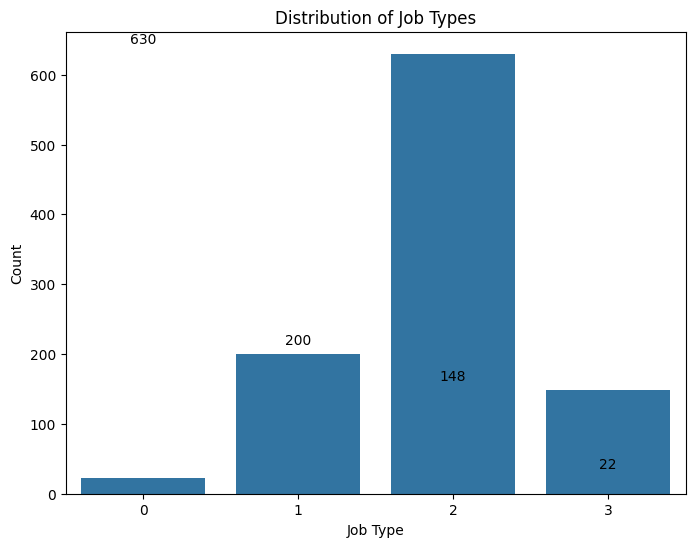

In [20]:
# Count the occurrences of each Job type
Job_counts = df['Job'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=Job_counts.index, y=Job_counts.values)
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.title("Distribution of Job Types")

# Annotate the plot with counts
for i, v in enumerate(Job_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

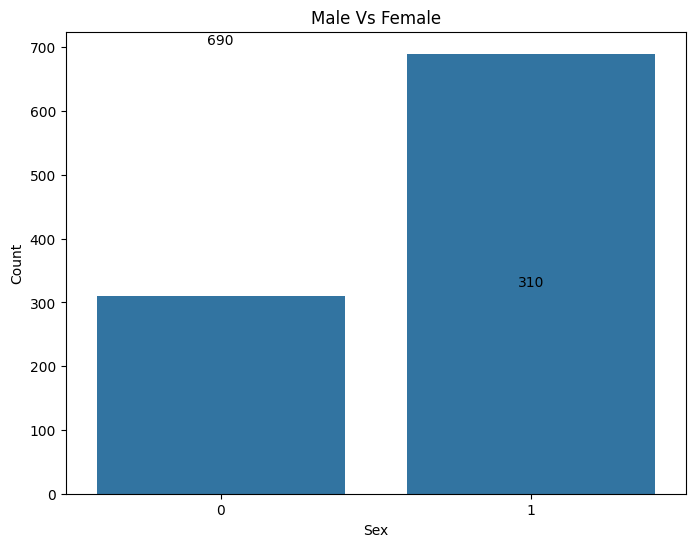

In [21]:
sex_counts = df['Sex'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Male Vs Female")

# Annotate the plot with counts
for i, v in enumerate(sex_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

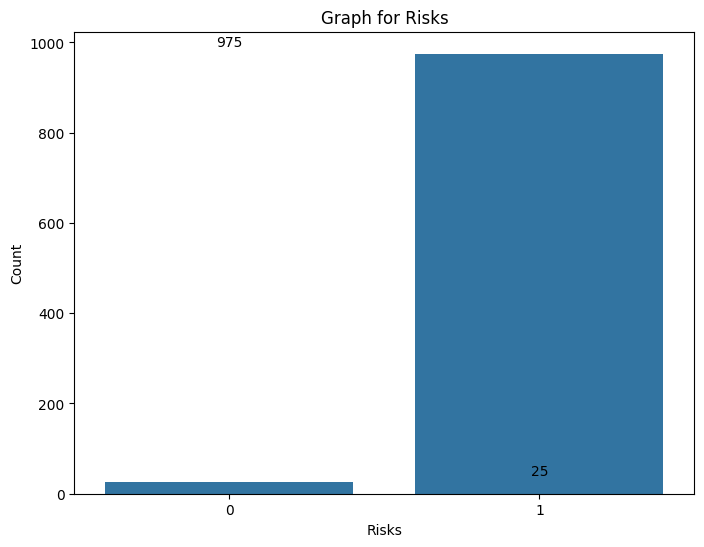

In [22]:
# Count the occurrences of Risks
Risk_counts = df['Credit Risk'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=Risk_counts.index, y=Risk_counts.values)
plt.xlabel("Risks")
plt.ylabel("Count")
plt.title("Graph for Risks")

# Annotate the plot with counts
for i, v in enumerate(Risk_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

In [23]:
df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,67,1,2,1,0,little,1169,6,5,1
1,22,0,2,1,0,moderate,5951,48,5,0
2,49,1,1,1,0,little,2096,12,3,1
3,45,1,2,0,0,little,7882,42,4,1
4,53,1,2,0,0,little,4870,24,1,1


In [24]:
categorical_features = ['Saving accounts', 'Checking account']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoded_data = encoder.fit_transform(df[categorical_features])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the encoded features
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [25]:
# Split into X, y
X = df.drop('Credit Risk', axis=1)
y = df['Credit Risk']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(X_train,y_train)

predictions=svm.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.97      1.00      0.98       194

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200

[[  0   6]
 [  0 194]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

dt_predictions =dt.predict(X_test)
rf_predictions =rf.predict(X_test)

In [30]:
print(classification_report(y_test,rf_predictions))
print(confusion_matrix(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.98      0.99      0.99       194

    accuracy                           0.97       200
   macro avg       0.82      0.66      0.72       200
weighted avg       0.97      0.97      0.97       200

[[  2   4]
 [  1 193]]


In [31]:
print(classification_report(y_test,dt_predictions))
print(confusion_matrix(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00       194

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

[[  6   0]
 [  0 194]]


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_predictions=knn.predict(X_test)

In [33]:
print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))


              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.97      1.00      0.99       194

    accuracy                           0.97       200
   macro avg       0.99      0.58      0.64       200
weighted avg       0.98      0.97      0.97       200

[[  1   5]
 [  0 194]]


In [34]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_predictions=xgb.predict(X_test)

In [35]:
print(classification_report(y_test, xgb_predictions))
print(confusion_matrix(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.99      0.99      0.99       194

    accuracy                           0.98       200
   macro avg       0.89      0.83      0.86       200
weighted avg       0.98      0.98      0.98       200

[[  4   2]
 [  1 193]]
